<a href="https://colab.research.google.com/github/navgaur/QM1_UGCF/blob/main/Schrodinger_Eqn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Mechanics 1 for UGCF Quantum Mechanics 1 Lab (DSC paper)**


# Unit - 2
---
##**Solve the Schrodinger equation using shooting/finite difference or any other method for 1-d potentials**

 - Particle in a box
 - Particle in a finite potential well
 - Harmonic potential
---

###**Particle in a box**

Schrodinger Equation:

$$ -\frac{\hbar^2}{2 m} \frac{d^2 \psi}{d x^2} = E \psi $$

Finite Difference:

$$\frac{d^2 \psi}{d x^2} =
\frac{\psi(x_{i-1}) - 2\psi(x_{i-1}) + \psi(x_{i+1})}{(\triangle x)^2} $$

Boundary conditions are $\psi(0) = \psi(L) = 0$. This is equivalent to
$$H[0,0] = H[-1,-1] = 1$$
The reason being that for above values as $H[0,0]=1, H[0,1]=0$ :
$$H[0,0] \psi_0 + H[0,1] \psi_1= E \times \psi_0$$
resulting in $\psi_0 = 0$. Similar with $H[-1,-1]$ the conditions at the other boundary.

The conditions
$$H[0,1] = H[-1,-2] = 0$$
decouples the other inside (the boundary) solutions from the boundary solutions
that are zero.

### Finite Difference Method (FDM)

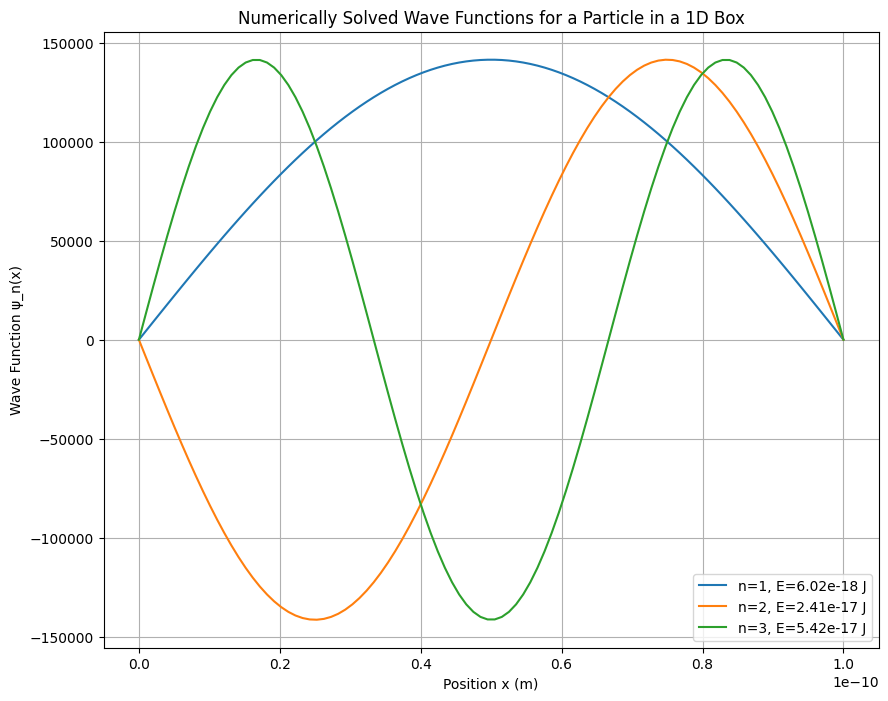

Energy level n=1: E_FDM = 6.02e-18 J, E_analytical = 6.02e-18
Energy level n=2: E_FDM = 2.41e-17 J, E_analytical = 2.41e-17
Energy level n=3: E_FDM = 5.42e-17 J, E_analytical = 5.42e-17


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (Joule*seconds)
m = 9.10938356e-31    # Mass of electron (kg)
L = 1e-10             # Length of the box (meters)
N = 100           # Number of discrete points

# Analytical energy levels for comparison
def analytical_energy(n):
    return n**2 * np.pi**2 * hbar**2 / (2 * m * L**2)

# Discretize the space
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# Create the Hamiltonian matrix using finite difference method
H = np.zeros((N, N))

# Fill the Hamiltonian matrix (kinetic energy part)
for i in range(1, N-1):
    H[i, i] = -2.0
    H[i, i-1] = H[i, i+1] = 1.0

# Apply the scaling factor for the kinetic energy operator
H = -H * (hbar**2 / (2 * m * dx**2))

# Set boundary conditions: Ensuring wave functions are zero at the boundaries
H[0, 0] = H[-1, -1] = 1.0    # This ensures zero eigenvalues
H[0, 1] = H[-1, -2] = 0.0

# Solve the eigenvalue problem Hψ = Eψ
energies, wavefunctions = eigh(H)

# Normalize the wave functions
wavefunctions = wavefunctions.T / np.sqrt(dx)

# Plot the first 3 wave functions
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(x, wavefunctions[i], label=f"n={i+1}, E={energies[i]:.2e} J")

plt.title("Numerically Solved Wave Functions for a Particle in a 1D Box")
plt.xlabel("Position x (m)")
plt.ylabel("Wave Function ψ_n(x)")
plt.legend()
plt.grid(True)
plt.show()

# Print the first 3 energy levels
for i in range(3):
  E_analytical = analytical_energy(i+1)
  print(f"Energy level n={i+1}: E_FDM = {energies[i]:.2e} J, E_analytical = {E_analytical:.2e}")



### Shooting Method

Schrodinger Equation:

$$ -\frac{\hbar^2}{2 m} \frac{d^2 \psi(x)}{d x^2} + V(x) \psi (x) = E \psi(x) $$

Converting the second order DE into two first order DE's:
$$  \frac{d \psi}{dx} = \phi$$
$$ \frac{d \phi}{dx} = \frac{2m}{\hbar^2} (V - E)$$



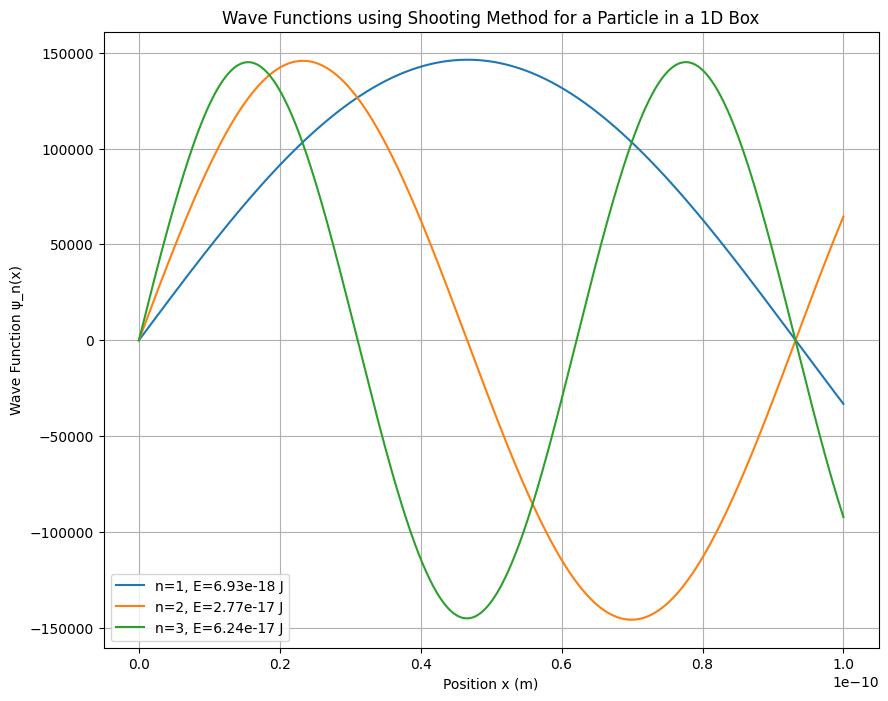

Energy level n=1: E = 6.93e-18 J
Energy level n=2: E = 2.77e-17 J
Energy level n=3: E = 6.24e-17 J


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (Joule*seconds)
m = 9.10938356e-31    # Mass of electron (kg)
L = 1e-10             # Length of the box (meters)
N = 1500              # Number of discrete points

# Define the potential function V(x) for an infinite box
def V(x):
    return 0 if 0 <= x <= L else np.inf

# Define the Schrödinger equation as a system of first-order ODEs
def schrodinger(x, y, E):
    psi, phi = y
    dpsi_dx = phi
    dphi_dx = 2 * m / hbar**2 * (V(x) - E) * psi
    return [dpsi_dx, dphi_dx]

# Shooting method to find the wave function for a given energy
def solve_schrodinger(E, x):
    # Initial conditions: psi(0) = 0, psi'(0) = 1 (arbitrary)
    y0 = [0, 1]
    sol = solve_ivp(schrodinger, [0, L], y0, args=(E,), t_eval=x)
    return sol.y[0]  # return psi(x)

# Find energy by matching boundary condition psi(L) = 0 using a root-finding method
from scipy.optimize import root_scalar

def find_energy_level(n):
    # Define a function whose root we want to find
    def boundary_condition(E):
        psi = solve_schrodinger(E, np.linspace(0, L, N))
        return psi[-1]  # We want psi(L) = 0

    # Estimate the energy for the nth level: E_n = (n^2 * pi^2 * hbar^2) / (2 * m * L^2)
    E_guess = n**2 * np.pi**2 * hbar**2 / (2 * m * L**2)

    # Use root-finding to match boundary condition psi(L) = 0
    sol = root_scalar(boundary_condition, bracket=[0.85 * E_guess, 1.15 * E_guess], method='brentq')
    return sol.root

# Calculate the first 3 energy levels and their corresponding wave functions
x = np.linspace(0, L, N)
energies = []
wavefunctions = []

for n in range(1, 4):
    E_n = find_energy_level(n)
    energies.append(E_n)
    psi_n = solve_schrodinger(E_n, x)
    wavefunctions.append(psi_n / np.sqrt(np.trapz(psi_n**2, x)))  # Normalize wave function

# Plot the wave functions
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(x, wavefunctions[i], label=f"n={i+1}, E={energies[i]:.2e} J")

plt.title("Wave Functions using Shooting Method for a Particle in a 1D Box")
plt.xlabel("Position x (m)")
plt.ylabel("Wave Function ψ_n(x)")
plt.legend()
plt.grid(True)
plt.show()

# Print the first 3 energy levels
for i in range(3):
    print(f"Energy level n={i+1}: E = {energies[i]:.2e} J")


Shooting Method Energy Levels (Joules) vs Analytical
n=1: E_shooting = 6.63e-18, E_analytical = 6.02e-18
n=2: E_shooting = 2.65e-17, E_analytical = 2.41e-17
n=3: E_shooting = 5.96e-17, E_analytical = 5.42e-17


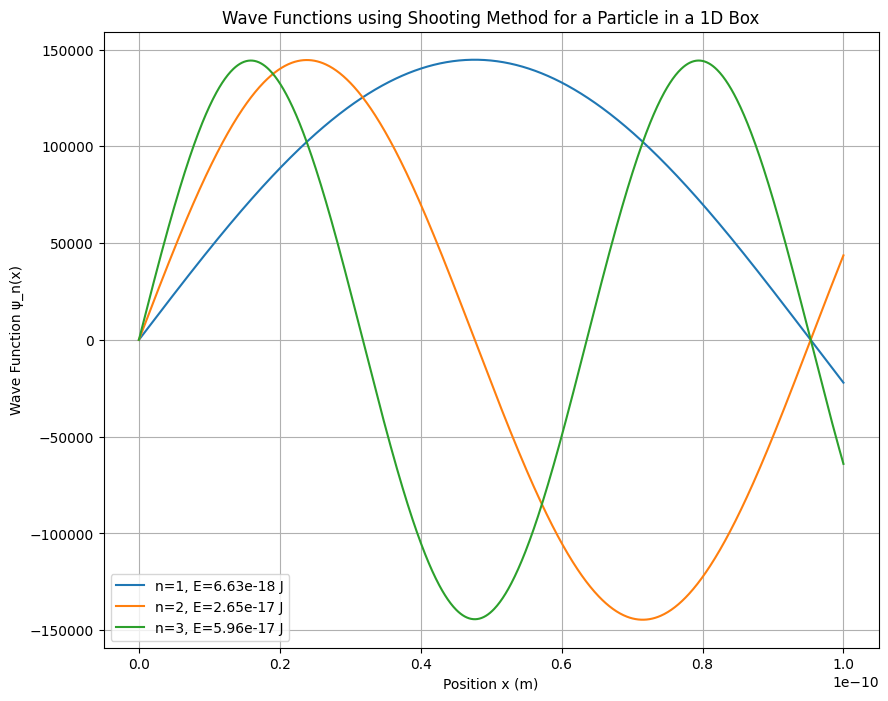

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (Joule*seconds)
m = 9.10938356e-31    # Mass of electron (kg)
L = 1e-10             # Length of the box (meters)
N = 1000              # Number of discrete points
x = np.linspace(0, L, N)

# Analytical energy levels for comparison
def analytical_energy(n):
    return n**2 * np.pi**2 * hbar**2 / (2 * m * L**2)

# Define the potential function V(x) for an infinite box
def V(x):
    return 0 if 0 <= x <= L else np.inf

# Define the Schrödinger equation as a system of first-order ODEs
def schrodinger(x, y, E):
    psi, phi = y
    dpsi_dx = phi
    dphi_dx = 2 * m / hbar**2 * (V(x) - E) * psi
    return [dpsi_dx, dphi_dx]

# Solve the Schrödinger equation using initial conditions
def solve_schrodinger(E, x, atol=1e-10, rtol=1e-10):
    y0 = [0, 1]  # psi(0) = 0, arbitrary psi'(0) = 1
    sol = solve_ivp(schrodinger, [0, L], y0, args=(E,), t_eval=x, atol=atol, rtol=rtol)
    return sol.y[0]  # Return the wave function psi(x)

# Use root-finding to adjust energy to satisfy boundary condition psi(L) = 0
def find_energy_level(n, atol=1e-10, rtol=1e-10):
    def boundary_condition(E):
        psi = solve_schrodinger(E, x, atol=atol, rtol=rtol)
        return psi[-1]  # We want psi(L) = 0

    # Estimate the energy for the nth level: E_n = n^2 * pi^2 * hbar^2 / (2 * m * L^2)
    E_guess = analytical_energy(n)

    # Root finding to match boundary condition psi(L) = 0
    sol = root_scalar(boundary_condition, bracket=[0.9 * E_guess, 1.1 * E_guess], method='brentq', xtol=1e-12)
    return sol.root

# Calculate the first 3 energy levels and their wave functions using the shooting method
shooting_energies = []
wavefunctions = []
for n in range(1, 4):
    E_n = find_energy_level(n)
    shooting_energies.append(E_n)
    psi_n = solve_schrodinger(E_n, x)
    wavefunctions.append(psi_n / np.sqrt(np.trapz(psi_n**2, x)))  # Normalize wave function

# Compare to the analytical energy levels
print("Shooting Method Energy Levels (Joules) vs Analytical")
for n in range(1, 4):
    E_shooting = shooting_energies[n-1]
    E_analytical = analytical_energy(n)
    print(f"n={n}: E_shooting = {E_shooting:.2e}, E_analytical = {E_analytical:.2e}")

# Plot the first 3 wave functions from the shooting method
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(x, wavefunctions[i], label=f"n={i+1}, E={shooting_energies[i]:.2e} J")

plt.title("Wave Functions using Shooting Method for a Particle in a 1D Box")
plt.xlabel("Position x (m)")
plt.ylabel("Wave Function ψ_n(x)")
plt.legend()
plt.grid(True)
plt.show()


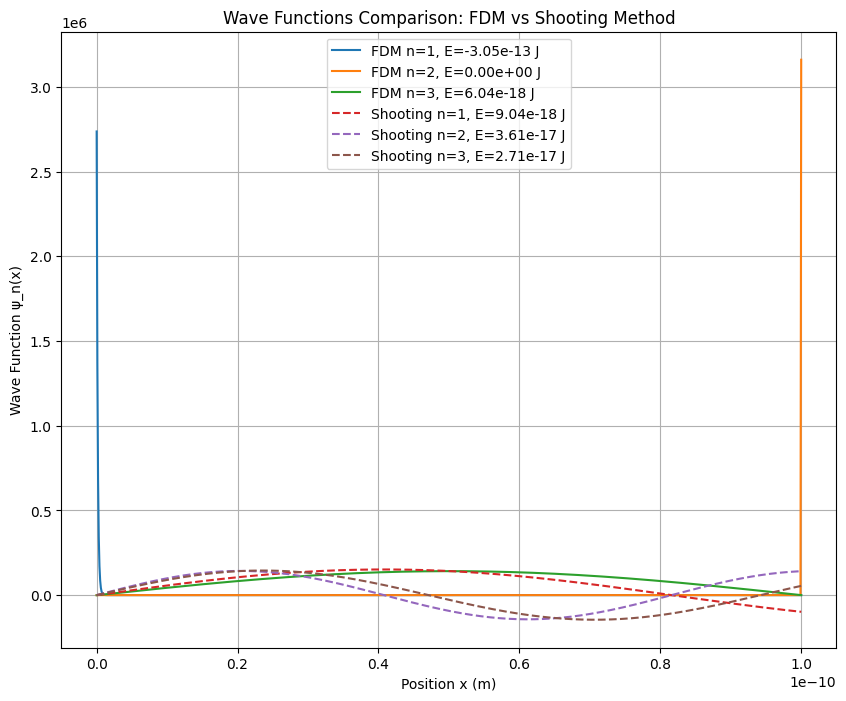

Energy levels comparison (in Joules):
n=1: FDM E = -3.05e-13, Shooting E = 9.04e-18
n=2: FDM E = 0.00e+00, Shooting E = 3.61e-17
n=3: FDM E = 6.04e-18, Shooting E = 2.71e-17


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (Joule*seconds)
m = 9.10938356e-31    # Mass of electron (kg)
L = 1e-10             # Length of the box (meters)
N = 1000              # Number of discrete points
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# ========================
# Finite Difference Method
# ========================

def finite_difference_method():
    H = np.zeros((N, N))

    # Fill the Hamiltonian matrix
    for i in range(1, N-1):
        H[i, i] = -2.0
        H[i, i-1] = H[i, i+1] = 1.0

    # Scale Hamiltonian matrix
    H = -H * (hbar**2 / (2 * m * dx**2))

    # Solve the eigenvalue problem Hψ = Eψ
    energies, wavefunctions = eigh(H)

    # Normalize the wave functions
    wavefunctions = wavefunctions.T / np.sqrt(dx)

    return energies, wavefunctions

# ========================
# Shooting Method
# ========================

def V(x):
    return 0 if 0 <= x <= L else np.inf

def schrodinger(x, y, E):
    psi, phi = y
    dpsi_dx = phi
    dphi_dx = 2 * m / hbar**2 * (V(x) - E) * psi
    return [dpsi_dx, dphi_dx]

def solve_schrodinger(E, x):
    y0 = [0, 1]
    sol = solve_ivp(schrodinger, [0, L], y0, args=(E,), t_eval=x)
    return sol.y[0]

def find_energy_level(n):
    def boundary_condition(E):
        psi = solve_schrodinger(E, x)
        return psi[-1]  # We want psi(L) = 0

    E_guess = n**2 * np.pi**2 * hbar**2 / (2 * m * L**2)
    sol = root_scalar(boundary_condition, bracket=[0.5 * E_guess, 1.5 * E_guess], method='brentq')
    return sol.root

def shooting_method():
    energies = []
    wavefunctions = []

    for n in range(1, 4):
        E_n = find_energy_level(n)
        energies.append(E_n)
        psi_n = solve_schrodinger(E_n, x)
        wavefunctions.append(psi_n / np.sqrt(np.trapz(psi_n**2, x)))  # Normalize wave function

    return energies, wavefunctions

# ========================
# Compare Results
# ========================

# Finite Difference Method
fdm_energies, fdm_wavefunctions = finite_difference_method()

# Shooting Method
shooting_energies, shooting_wavefunctions = shooting_method()

# Plot the first wave function from each method
plt.figure(figsize=(10, 8))

# FDM wave functions
for i in range(3):
    plt.plot(x, fdm_wavefunctions[i], label=f"FDM n={i+1}, E={fdm_energies[i]:.2e} J")

# Shooting method wave functions
for i in range(3):
    plt.plot(x, shooting_wavefunctions[i], linestyle='--', label=f"Shooting n={i+1}, E={shooting_energies[i]:.2e} J")

plt.title("Wave Functions Comparison: FDM vs Shooting Method")
plt.xlabel("Position x (m)")
plt.ylabel("Wave Function ψ_n(x)")
plt.legend()
plt.grid(True)
plt.show()

# Print the energy levels from both methods
print("Energy levels comparison (in Joules):")
for i in range(3):
    print(f"n={i+1}: FDM E = {fdm_energies[i]:.2e}, Shooting E = {shooting_energies[i]:.2e}")


### **Particle in a finite potential well**

Schrodinger Equation:

$$ -\frac{\hbar^2}{2 m} \frac{d^2 \psi(x)}{d x^2} + V(x) \psi (x) = E \psi(x) $$

$$V(x) = 0, ~~~ 0 \leq x \leq L$$  
$$V(x) = V_0, ~~~ x < 0, x > L $$  

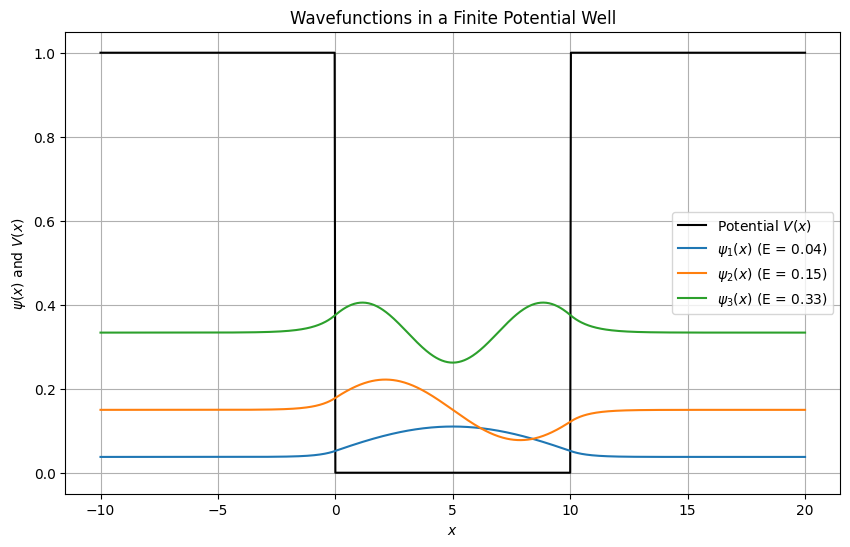

First few energy eigenvalues:
E_1 = 0.03762
E_2 = 0.14971
E_3 = 0.33361


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0  # Planck's constant (in atomic units)
m = 1.0     # Particle mass (in atomic units)

# Define the potential well parameters
L = 10.0    # Width of the well
V0 = 1.0   # Height of the potential outside the well
N = 1000    # Number of grid points
x = np.linspace(-L, 2*L, N)  # Spatial grid from -L to 2L
dx = x[1] - x[0]  # Spatial step size

# Define the potential V(x)
V = np.zeros(N)
V[x < 0] = V0  # Potential outside the left side of the well
V[x > L] = V0  # Potential outside the right side of the well

# Hamiltonian matrix
H = np.zeros((N, N))

# Fill the Hamiltonian matrix using finite difference method
for i in range(1, N-1):
    H[i, i-1] = H[i, i+1] = -hbar**2 / (2 * m * dx**2)  # Off-diagonal terms
    H[i, i] = hbar**2 / (m * dx**2) + V[i]              # Diagonal terms

# Boundary conditions (psi(x) = 0 at the boundaries)
H[0, 0] = H[N-1, N-1] = 1e10  # Large value to enforce psi(0) = psi(N) = 0

# Solve the eigenvalue problem for H
energies, wavefunctions = eigh(H)

# Convert energy eigenvalues to physical units (if needed)
# Here we assume hbar = m = 1 (atomic units)

# Plot the potential and first few wavefunctions
plt.figure(figsize=(10, 6))
plt.plot(x, V, label="Potential $V(x)$", color='black')

# Plot the first 3 wavefunctions (scaled for visualization)
for n in range(3):
    plt.plot(x, wavefunctions[:, n] + energies[n], label=f"$\psi_{n+1}(x)$ (E = {energies[n]:.2f})")

plt.xlabel("$x$")
plt.ylabel("$\psi(x)$ and $V(x)$")
plt.legend()
plt.title("Wavefunctions in a Finite Potential Well")
plt.grid(True)
plt.show()

# Print the first few energy eigenvalues
print("First few energy eigenvalues:")
for n in range(3):
    print(f"E_{n+1} = {energies[n]:.5f}")
